In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_project(5).csv')
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


# Goal

- Last Column is Target Variable
- Enter into production we lose money. 
    - class one prediction that is not actually class one = 100 loss
    - class 0 prediction that is not class zero = 40 loss

Accurately predict the class that minimizes the financial losses. 

# <span style = 'color:red'>I HATE LOSING MONEY</span>

# Data Inspection

In [3]:
df.shape

(160000, 51)

160k rows, and 51 columns

In [4]:
df['y'].value_counts()

0    95803
1    64197
Name: y, dtype: int64

Text(0.5, 0, 'Target Variable')

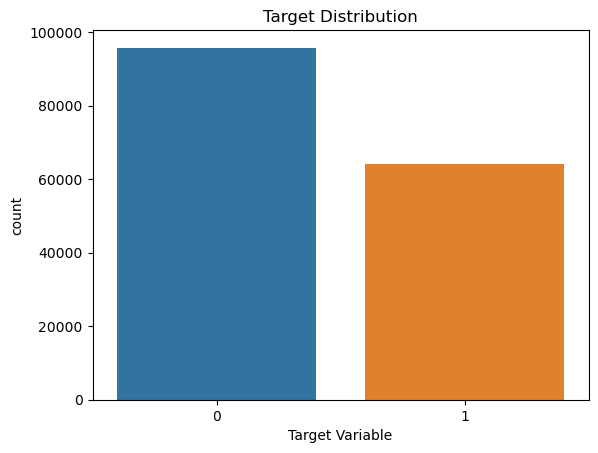

In [5]:
sns.countplot(data = df, x = 'y')
plt.title('Target Distribution') 
plt.xlabel('Target Variable')

2 classes to predict, slight imbalance.
59% are 0

In [6]:
df.isna().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

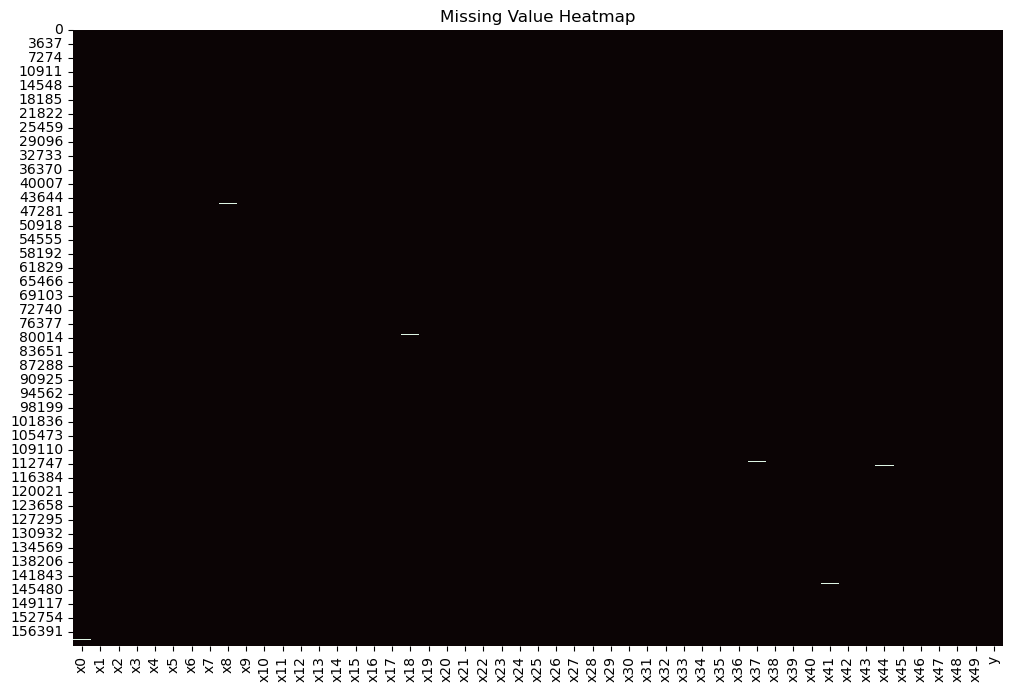

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),
            cmap = 'mako',
            cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

In [8]:
def missing_val_percentage(df):
    total = len(df)
    percentage = (df.isna().sum()/total) * 100
    print(percentage)

missing_val_percentage(df)

x0     0.016250
x1     0.015625
x2     0.023750
x3     0.023125
x4     0.016250
x5     0.023125
x6     0.016250
x7     0.016875
x8     0.013125
x9     0.018750
x10    0.026875
x11    0.018750
x12    0.022500
x13    0.019375
x14    0.021250
x15    0.021875
x16    0.016250
x17    0.016875
x18    0.025000
x19    0.021875
x20    0.023750
x21    0.018125
x22    0.016875
x23    0.029375
x24    0.017500
x25    0.013750
x26    0.022500
x27    0.018750
x28    0.021875
x29    0.018750
x30    0.018750
x31    0.024375
x32    0.019375
x33    0.025625
x34    0.025625
x35    0.018750
x36    0.016875
x37    0.014375
x38    0.019375
x39    0.014375
x40    0.022500
x41    0.025000
x42    0.016250
x43    0.023125
x44    0.025000
x45    0.018125
x46    0.019375
x47    0.023125
x48    0.020000
x49    0.020000
y      0.000000
dtype: float64


Such as small amount of data is missing, additionally there appears to be no patterns to explain the missingness in the data. we will proceed with removal of the missing values. effectively this means removing 1608 values from our data.

In [9]:
import pandas as pd

# Create a new DataFrame to store missing value indicators
missing_indicators = pd.DataFrame()

# For each column in the DataFrame, create a corresponding indicator column
for column in df.columns:
    missing_indicators[column + '_missing'] = df[column].isna().astype(int)

# This allows you to see the correlation between features and missingness
df_with_indicators = pd.concat([df, missing_indicators], axis=1)

correlation_matrix = df_with_indicators.corr()

# Extract correlations of missing indicators with other features
missing_value_correlations = correlation_matrix[missing_indicators.columns].drop(missing_indicators.columns)

# Sort by absolute value to see the highest correlations first
sorted_correlations = missing_value_correlations.abs().unstack().sort_values(ascending=False)

# Filter out self-correlations (correlation of indicators with themselves)
non_self_correlations = sorted_correlations[sorted_correlations < 1]

# Print out the highest absolute correlations
print(non_self_correlations * 100)



C:\Users\Joey\AppData\Local\Temp\ipykernel_23452\2860011729.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_with_indicators.corr()


x39_missing  x10    0.848010
x23_missing  x31    0.829952
x49_missing  x47    0.828414
x15_missing  x16    0.788476
x26_missing  x1     0.764006
                      ...   
x20_missing  x8     0.001085
x26_missing  x49    0.000849
x24_missing  x20    0.000721
x10_missing  x35    0.000264
x42_missing  x35    0.000216
Length: 2255, dtype: float64


In [10]:
non_self_correlations.max() * 100

0.8480099590725956

In [11]:
df.dropna(inplace = True)
df.shape

(158392, 51)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x0,158392.0,-0.000808,0.371064,-1.592635,-0.251246,-0.001818,0.248622,1.600849
x1,158392.0,0.003705,6.340297,-26.278302,-4.259016,0.010023,4.286606,27.988178
x2,158392.0,-1.148314,13.274738,-59.394048,-10.166609,-1.342199,7.878130,63.545653
x3,158392.0,-0.023012,8.066624,-33.864827,-5.453044,-0.028470,5.448332,38.906025
x4,158392.0,-0.000266,6.383306,-28.467536,-4.313987,-0.001138,4.308644,26.247812
x5,158392.0,0.013282,7.672102,-33.822988,-5.152419,0.015135,5.191172,35.550110
x6,158392.0,-1.669562,19.300472,-86.354483,-14.781485,-1.951457,11.454209,92.390605
x7,158392.0,-7.697877,30.541562,-181.506976,-27.315875,-6.959275,12.215119,149.150634
x8,158392.0,-0.028853,8.904048,-37.691045,-6.034094,-0.016173,5.978646,39.049831
x9,158392.0,0.004320,6.354359,-27.980659,-4.260304,0.003098,4.303807,27.377842


We have data in various ranges/scales. this will need to be normalized

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  float64
 7   x7      158392 non-null  float64
 8   x8      158392 non-null  float64
 9   x9      158392 non-null  float64
 10  x10     158392 non-null  float64
 11  x11     158392 non-null  float64
 12  x12     158392 non-null  float64
 13  x13     158392 non-null  float64
 14  x14     158392 non-null  float64
 15  x15     158392 non-null  float64
 16  x16     158392 non-null  float64
 17  x17     158392 non-null  float64
 18  x18     158392 non-null  float64
 19  x19     158392 non-null  float64
 20  x20     158392 non-null  float64
 21  x21     15

Data seems to have a few columns which are not numerical. (or they are but need to be processed)

# Data Standardization and Cleaning

x24 = country (asia, europe, america) with counts respectively 137596, 16378, 4418 - one hot encoding


x29 = months(july, jun, aug, may, sept, apr, oct, mar, nov, feb, dev, jan) - one hot encoding
counts(45122,40900,29115,21708,10740,6699,2385,1221,331,139,23,9 )

x30 = day of week(monday-friday) - one hot encoding

x32 = percentage value - turning into float and leaving as is
 
x37 = money - taking away dollar sign and keeping as float

In [14]:
# changing x29 to have standard names
df['x29'] = df['x29'].astype('category')
df['x29'] = df['x29'].cat.rename_categories({'Jun':'June','sept.':'Sept',
                                            'Dev':'Dec','January':'Jan'})

In [15]:
# strip the $ and make into an float feature. 
df['money'] = df['x37'].replace('[\$]','', regex=True).astype(float)

df.drop('x37',inplace=True, axis=1)

In [16]:
df['decimal'] = df['x32'].replace('[\%]', '',regex=True).astype(float) / 100 
df.drop('x32', axis=1, inplace=True)

In [17]:
df = pd.get_dummies(df, columns=['x29','x24','x30'], drop_first=True).astype('int')
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_May,x29_Nov,x29_Oct,x29_Sept,x24_asia,x24_euorpe,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,0,-3,4,2,-1,0,6,-14,-1,-4,...,0,0,0,0,0,1,0,0,1,0
1,0,0,27,4,6,-2,40,-6,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1,12,6,-5,-11,17,11,5,-2,...,0,0,0,0,1,0,0,0,0,1
3,0,5,-24,3,6,2,-35,-18,0,-5,...,0,0,0,0,1,0,0,0,0,1
4,0,0,-11,1,2,0,-16,27,1,-4,...,0,0,0,0,1,0,0,0,1,0


In [18]:
df['y'] = df['y'].astype('category')

# Data Preprocessing

scaling features we want to not scale hot encoded features, and also not scale 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('y', axis=1)
y = df['y']

In [20]:
col_to_scale =['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
            'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
            'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x33', 'x34',
            'x35', 'x36', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45',
            'x46', 'x47', 'x48', 'x49', 'money', 'decimal']

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[col_to_scale])

X[col_to_scale] = scaled_data

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into main training set and test set (80% - 20%)
X_train_main, X_test, y_train_main, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12, stratify=y)

# Further split the main training set into training and validation sets (75% - 25% of main training)
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_main, y_train_main, test_size=0.25, random_state=12, stratify=y_train_main)


# Base Model - Random Forest

Validation Confusion Matrix:
[[18033   936]
 [ 1986 10724]]

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     18969
           1       0.92      0.84      0.88     12710

    accuracy                           0.91     31679
   macro avg       0.91      0.90      0.90     31679
weighted avg       0.91      0.91      0.91     31679

Test Confusion Matrix:
[[18013   957]
 [ 1949 10760]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     18970
           1       0.92      0.85      0.88     12709

    accuracy                           0.91     31679
   macro avg       0.91      0.90      0.90     31679
weighted avg       0.91      0.91      0.91     31679



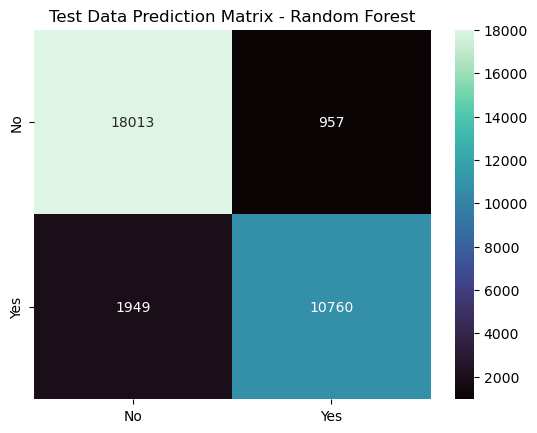

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier(class_weight='balanced')

# Fit the model on the training set
rf.fit(X_train, y_train)

# predict on validation set
y_validation_pred = rf.predict(X_validation)

# Evaluate predictions using the validation set
cm_validation = confusion_matrix(y_validation, y_validation_pred)
cr_validation = classification_report(y_validation, y_validation_pred)

print("Validation Confusion Matrix:")
print(cm_validation)
print("\nValidation Classification Report:")
print(cr_validation)


y_test_pred = rf.predict(X_test)

cm_test = confusion_matrix(y_test, y_test_pred)
cr_test = classification_report(y_test, y_test_pred)

print("Test Confusion Matrix:")
print(cm_test)
print("\nTest Classification Report:")
print(cr_test)

# print out test metrics
sns.heatmap(cm_test, annot=True, fmt='.0f', cmap = 'mako')
plt.title('Test Data Prediction Matrix - Random Forest')
plt.xticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.yticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.show()

Model Predictions Cost us: $128,720

# XGBoost

In [23]:
import xgboost as xgb

# Create the DMatrix for train, validation, and test sets
dtrain = xgb.DMatrix(X_train, label = y_train)
dvalidation = xgb.DMatrix(X_validation, label = y_validation)
dtest = xgb.DMatrix(X_test, label = y_test)

evallist = [(dtrain, 'train'), (dvalidation, 'validation')]

## Param Search

In [24]:
params = {
    'booster':'gbtree',
    'objective':'binary:logistic',
    'eta':0.1,
    'subsample':.5,
    'colsample_bytree':.5,
    'max_depth':3,
}

max_depth = [3,5,10,15,20,40]
sub_s = np.random.random(10)
cols = np.random.random(10)
md = np.random.randint(0,6,10)
for i in range(10):
    params['subsample'] = sub_s[i]
    params['colsample_bytree']=cols[i]
    params['max_depth'] = max_depth[md[i]]
    tmp = xgb.cv(
        params, dtrain, num_boost_round=2000,
        nfold = 5, metrics=(['logloss']),
        early_stopping_rounds=5,
        as_pandas=True,verbose_eval=False,show_stdv=True,seed=0,shuffle=False)
    print('____________DONE____________')
    print(params)
    print(tmp.loc[tmp.shape[0]-1:,:])
    print("==============================")
    tmp = 0 

____________DONE____________
{'booster': 'gbtree', 'objective': 'binary:logistic', 'eta': 0.1, 'subsample': 0.6933070768191619, 'colsample_bytree': 0.6279204295635943, 'max_depth': 5}
      train-logloss-mean  train-logloss-std  test-logloss-mean  \
1172            0.100261           0.000693           0.199277   

      test-logloss-std  
1172           0.00181  
____________DONE____________
{'booster': 'gbtree', 'objective': 'binary:logistic', 'eta': 0.1, 'subsample': 0.580548360415606, 'colsample_bytree': 0.859240211480657, 'max_depth': 3}
      train-logloss-mean  train-logloss-std  test-logloss-mean  \
1921            0.183943           0.000856           0.233424   

      test-logloss-std  
1921          0.002292  
____________DONE____________
{'booster': 'gbtree', 'objective': 'binary:logistic', 'eta': 0.1, 'subsample': 0.675930885212629, 'colsample_bytree': 0.06109841873546429, 'max_depth': 20}
     train-logloss-mean  train-logloss-std  test-logloss-mean  \
454            0.1

## Cross Validation

In [25]:
num_round = 1000

params = {'booster': 'gbtree',  
        'objective': 'binary:logistic',
        'eta': 0.1, 'subsample': 0.6297428583724649,
        'colsample_bytree': 0.9236039374528398, 'max_depth': 20}

In [26]:
xgb_cv_results = xgb.cv(params = params,dtrain = dtrain,
                        num_boost_round=1000, nfold=5,
                        verbose_eval=True, early_stopping_rounds=5)

[0]	train-logloss:0.62844+0.00058	test-logloss:0.63971+0.00081
[1]	train-logloss:0.57367+0.00096	test-logloss:0.59376+0.00116
[2]	train-logloss:0.52517+0.00110	test-logloss:0.55291+0.00114
[3]	train-logloss:0.48270+0.00121	test-logloss:0.51741+0.00137
[4]	train-logloss:0.44602+0.00149	test-logloss:0.48740+0.00184
[5]	train-logloss:0.41299+0.00094	test-logloss:0.46075+0.00158
[6]	train-logloss:0.38294+0.00077	test-logloss:0.43629+0.00129
[7]	train-logloss:0.35650+0.00067	test-logloss:0.41510+0.00128
[8]	train-logloss:0.33273+0.00057	test-logloss:0.39646+0.00175
[9]	train-logloss:0.31137+0.00043	test-logloss:0.37988+0.00209
[10]	train-logloss:0.29176+0.00054	test-logloss:0.36451+0.00187
[11]	train-logloss:0.27378+0.00036	test-logloss:0.35034+0.00201
[12]	train-logloss:0.25743+0.00029	test-logloss:0.33749+0.00248
[13]	train-logloss:0.24232+0.00032	test-logloss:0.32584+0.00247
[14]	train-logloss:0.22846+0.00046	test-logloss:0.31513+0.00260
[15]	train-logloss:0.21577+0.00039	test-logloss:0.

In [27]:
xgb_cv_results

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.628445,0.000582,0.639706,0.000813
1,0.573671,0.000957,0.593762,0.001159
2,0.525169,0.001097,0.552911,0.001138
3,0.482704,0.001210,0.517407,0.001375
4,0.446016,0.001488,0.487401,0.001837
...,...,...,...,...
138,0.018547,0.000225,0.178626,0.003756
139,0.018369,0.000241,0.178573,0.003801
140,0.018203,0.000221,0.178535,0.003794
141,0.018029,0.000195,0.178498,0.003819


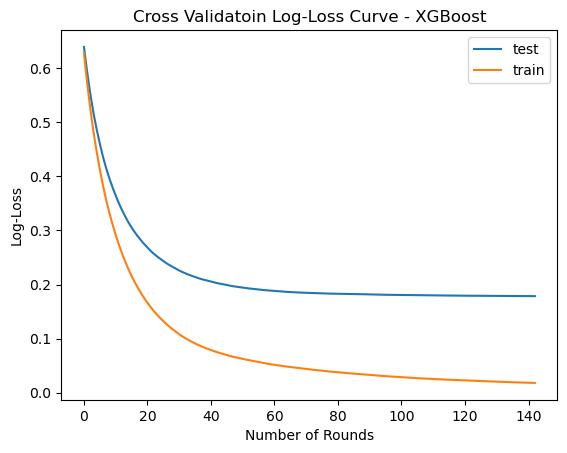

In [28]:
plt.plot(xgb_cv_results['test-logloss-mean'], label='test') 
plt.plot(xgb_cv_results['train-logloss-mean'], label = 'train') 
plt.title('Cross Validatoin Log-Loss Curve - XGBoost')
plt.xlabel('Number of Rounds')
plt.ylabel('Log-Loss')
plt.legend()
plt.show()

## Training Model

In [29]:
param = {'booster': 'gbtree',
        'objective': 'binary:logistic',
        'eta': 0.1, 'subsample': 0.6297428583724649,
        'colsample_bytree': 0.9236039374528398, 'max_depth': 20}

num_round =1000

evallist = [(dtrain,'train'), (dvalidation,'validation')]

xgb_model = xgb.train(param, dtrain,
                    num_round, evallist,
                    early_stopping_rounds=2)

c:\Users\Joey\anaconda3\envs\ML\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-logloss:0.62821	validation-logloss:0.63926
[1]	train-logloss:0.57066	validation-logloss:0.59002
[2]	train-logloss:0.52315	validation-logloss:0.55145
[3]	train-logloss:0.48036	validation-logloss:0.51506
[4]	train-logloss:0.44276	validation-logloss:0.48370
[5]	train-logloss:0.41049	validation-logloss:0.45770
[6]	train-logloss:0.38150	validation-logloss:0.43468
[7]	train-logloss:0.35494	validation-logloss:0.41319
[8]	train-logloss:0.33111	validation-logloss:0.39426
[9]	train-logloss:0.30959	validation-logloss:0.37696
[10]	train-logloss:0.28944	validation-logloss:0.36067
[11]	train-logloss:0.27181	validation-logloss:0.34714
[12]	train-logloss:0.25506	validation-logloss:0.33358
[13]	train-logloss:0.24006	validation-logloss:0.32174
[14]	train-logloss:0.22654	validation-logloss:0.31174
[15]	train-logloss:0.21390	validation-logloss:0.30220
[16]	train-logloss:0.20242	validation-logloss:0.29350
[17]	train-logloss:0.19206	validation-logloss:0.28571
[18]	train-logloss:0.18215	validation-

# Validating Model

In [30]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import f1_score

# Make predictions on the test data
y_test_pred = xgb_model.predict(dtest)

best_threshold = 0.5
best_f1 = 0

thresholds = np.linspace(0, 1, 100)

for threshold in thresholds:
    # Convert probabilities to binary output based on current threshold
    y_pred_binary = (y_test_pred > threshold).astype(int)
    
    # Calculate the F1 score
    current_f1 = f1_score(y_test, y_pred_binary)
    
    # If the current F1 score is better than the best so far, update the best threshold
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

# Print the best threshold and the corresponding F1 score
print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

y_test_pred_binary = (y_test_pred > best_threshold).astype(int)

Best Threshold: 0.4444444444444445
Best F1 Score: 0.9169783096484666


## Tuned XGBoost Test Results

Confusion Matrix:
[[17923  1047]
 [ 1062 11647]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     18970
           1       0.92      0.92      0.92     12709

    accuracy                           0.93     31679
   macro avg       0.93      0.93      0.93     31679
weighted avg       0.93      0.93      0.93     31679



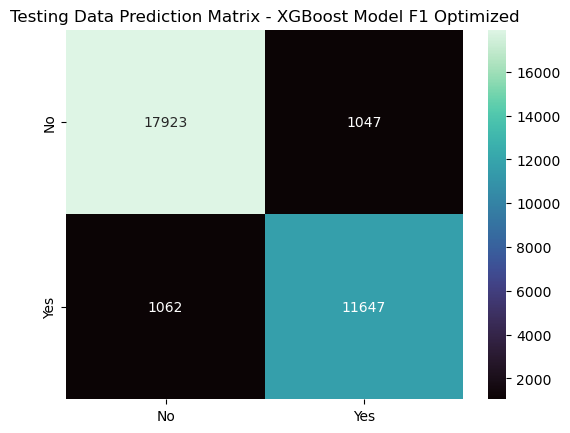

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_binary)

# Generate the classification report
cr = classification_report(y_test, y_test_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("\nClassification Report:")
print(cr)

sns.heatmap(cm, annot=True, fmt='.0f', cmap = 'mako')
plt.title('Testing Data Prediction Matrix - XGBoost Model F1 Optimized')
plt.xticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.yticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.show()


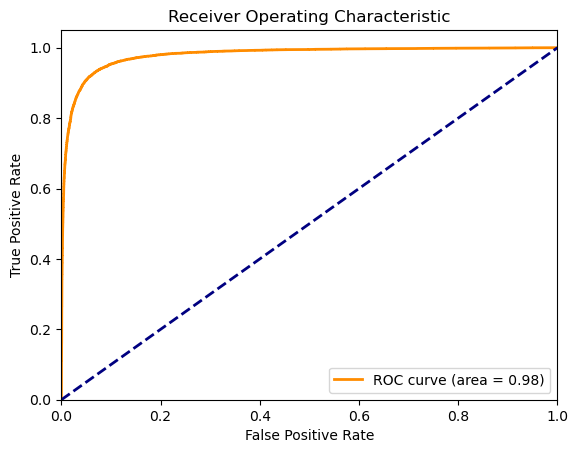

In [32]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Cost Optimized Threshold

Best Threshold: 0.6726726726726726
Updated Confusion Matrix:
[[18408   562]
 [ 1806 10903]]

Updated Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     18970
           1       0.95      0.86      0.90     12709

    accuracy                           0.93     31679
   macro avg       0.93      0.91      0.92     31679
weighted avg       0.93      0.93      0.92     31679



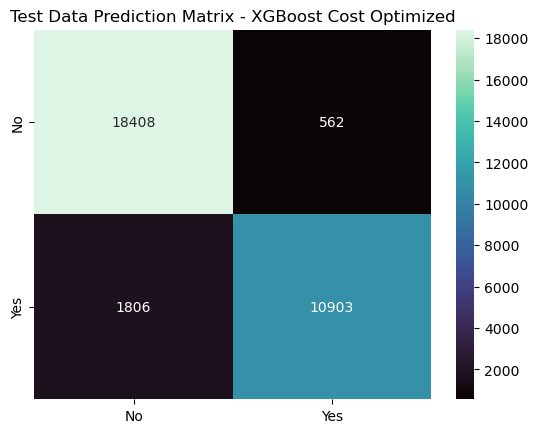

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Define costs
cost_fp = 100
cost_fn = 40

# Assume y_test_pred contains the predicted probabilities for the positive class
thresholds = np.linspace(0, 1, 1000)
min_cost = np.inf
best_threshold = None

for threshold in thresholds:
    # Convert probabilities to binary output based on the current threshold
    y_pred_binary = (y_test_pred > threshold).astype(int)
    
    # Calculate the confusion matrix for the current threshold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    
    # Calculate the total cost for the current threshold
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    
    # Update the minimum cost and the best threshold
    if total_cost < min_cost:
        min_cost = total_cost
        best_threshold = threshold

# Use the best threshold to update the binary predictions
y_test_pred_binary = (y_test_pred > best_threshold).astype(int)

# Recalculate the confusion matrix and classification report using the best threshold
cm = confusion_matrix(y_test, y_test_pred_binary)
cr = classification_report(y_test, y_test_pred_binary)

# Print the best threshold, the new confusion matrix, and the classification report
print(f"Best Threshold: {best_threshold}")
print("Updated Confusion Matrix:")
print(cm)
print("\nUpdated Classification Report:")
print(cr)

sns.heatmap(cm, annot=True, fmt='.0f', cmap = 'mako')
plt.title('Test Data Prediction Matrix - XGBoost Cost Optimized')
plt.xticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.yticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.show()


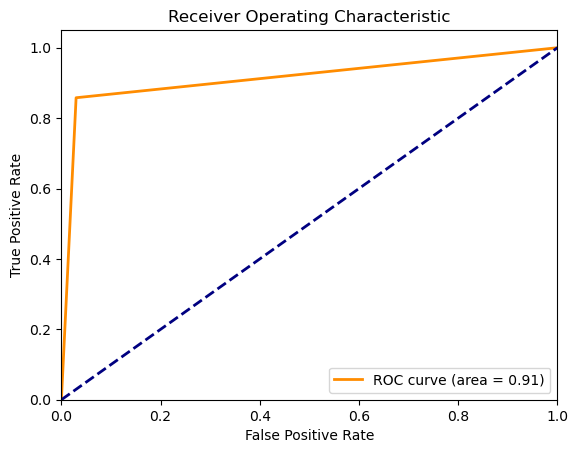

In [34]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Deep Neural Network

In [35]:
import tensorflow as tf

df['y'] = df['y'].astype(int)
X = df.drop('y', axis=1)
y = df['y']

In [36]:
col_to_scale =['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
            'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
            'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x33', 'x34',
            'x35', 'x36', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45',
            'x46', 'x47', 'x48', 'x49', 'money', 'decimal']

scaled_data = scaler.fit_transform(df[col_to_scale])

X[col_to_scale] = scaled_data

In [37]:
# Split the data into main training set and test set (80% - 20%)
X_train_main, X_test, y_train_main, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12, stratify=y)

# Further split the main training set into training and validation sets (75% - 25% of main training)
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_main, y_train_main, test_size=0.25, random_state=12, stratify=y_train_main)

In [38]:
X_train.shape

(95034, 64)

In [39]:
dnn = tf.keras.Sequential()

dnn.add(tf.keras.Input(shape = (64,)))
dnn.add(tf.keras.layers.Dense(32, activation = 'relu'))
dnn.add(tf.keras.layers.Dense(64, activation = 'relu'))
dnn.add(tf.keras.layers.Dense(32, activation = 'relu'))
dnn.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=.001)
dnn.compile(loss= 'BinaryCrossentropy',metrics = ['accuracy'], optimizer=opt)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

saftey = EarlyStopping(monitor = 'val_loss', patience = 10)
history = dnn.fit(X_train, y_train, epochs=1000,
                batch_size=100, callbacks=[saftey],
                validation_data=(X_validation,y_validation))

Epoch 1/1000
951/951 [==============================] - 2s 2ms/step - loss: 0.3965 - accuracy: 0.8172 - val_loss: 0.2913 - val_accuracy: 0.8775
Epoch 2/1000
951/951 [==============================] - 1s 1ms/step - loss: 0.2501 - accuracy: 0.8978 - val_loss: 0.2329 - val_accuracy: 0.9052
Epoch 3/1000
951/951 [==============================] - 1s 1ms/step - loss: 0.2099 - accuracy: 0.9176 - val_loss: 0.2043 - val_accuracy: 0.9203
Epoch 4/1000
951/951 [==============================] - 1s 1ms/step - loss: 0.1850 - accuracy: 0.9302 - val_loss: 0.1896 - val_accuracy: 0.9266
Epoch 5/1000
951/951 [==============================] - 1s 1ms/step - loss: 0.1691 - accuracy: 0.9367 - val_loss: 0.1759 - val_accuracy: 0.9338
Epoch 6/1000
951/951 [==============================] - 1s 1ms/step - loss: 0.1569 - accuracy: 0.9427 - val_loss: 0.1651 - val_accuracy: 0.9386
Epoch 7/1000
951/951 [==============================] - 1s 1ms/step - loss: 0.1464 - accuracy: 0.9461 - val_loss: 0.1540 - val_accuracy:

## CV Loss Curve

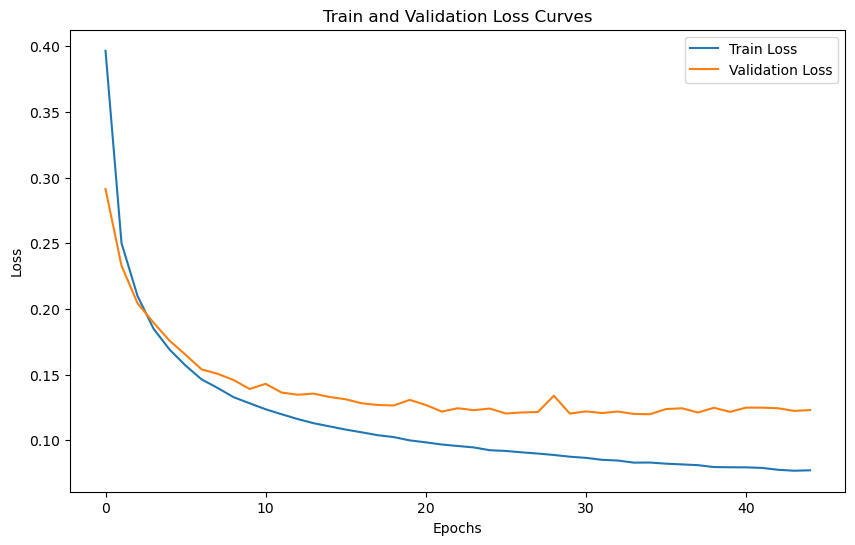

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

990/990 [==============================] - 1s 626us/step
Threshold that minimizes the total cost: 0.7373737373737375
Confusion Matrix:
[[18607   363]
 [ 1032 11677]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18970
           1       0.97      0.92      0.94     12709

    accuracy                           0.96     31679
   macro avg       0.96      0.95      0.95     31679
weighted avg       0.96      0.96      0.96     31679



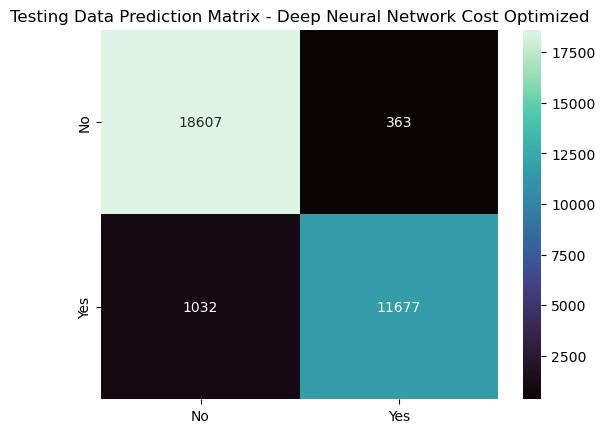

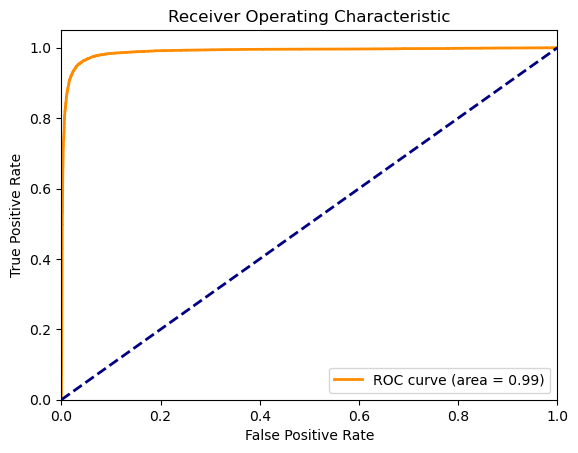

In [42]:
# Define the cost of false positives and false negatives
cost_fp = 100
cost_fn = 40

# Predict probabilities on the test set
y_pred_prob = dnn.predict(X_test).flatten()

# Initialize the list to store costs for each threshold
costs = []
thresholds = np.linspace(0, 1, 100)

# Loop over thresholds to calculate the total cost
for t in thresholds:
    y_pred = (y_pred_prob > t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    costs.append(total_cost)

# Find the threshold that minimizes the total cost
min_cost_index = np.argmin(costs)
min_cost_thres = thresholds[min_cost_index]
print(f'Threshold that minimizes the total cost: {min_cost_thres}')

# Generate predictions using the threshold that minimizes the total cost
y_pred_min_cost = (y_pred_prob > min_cost_thres).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_min_cost)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
cr = classification_report(y_test, y_pred_min_cost)
print("\nClassification Report:")
print(cr)

sns.heatmap(cm, annot=True, fmt='.0f', cmap = 'mako')
plt.title('Testing Data Prediction Matrix - Deep Neural Network Cost Optimized')
plt.xticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.yticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.show()



# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Entire Prediction Results - Cross Val Predict

In [43]:
from sklearn.model_selection import cross_val_predict

In [44]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

cost_fp = 100
cost_fn = 40 

kfold = StratifiedKFold(n_splits=5, shuffle=True)

best_threshold = []
all_true_labels = []
all_pred_labels = []

for train, test in kfold.split(X, y):
    dnn = tf.keras.Sequential([
        tf.keras.Input(shape=(64,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    dnn.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    X_np = X.values
    y_np = y.values

    # Fit the model
    dnn.fit(X_np[train], y_np[train], epochs=600, batch_size=100, verbose=2)

    # Predict probabilities on the validation set
    y_pred_prob = dnn.predict(X_np[test]).flatten()

    # Initialize the list to store costs for each threshold
    costs = []
    thresholds = np.linspace(0, 1, 100)

    # Loop over thresholds to calculate the total cost
    for t in thresholds:
        y_pred = (y_pred_prob > t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_np[test], y_pred).ravel()
        total_cost = (fp * cost_fp) + (fn * cost_fn)
        costs.append(total_cost)

    # Find the threshold that minimizes the total cost for the fold
    min_cost_index = np.argmin(costs)
    min_cost_thres = thresholds[min_cost_index]
    best_threshold.append(min_cost_thres)
    y_pred = (y_pred_prob > min_cost_thres).astype(int)
    all_true_labels.extend(y_np[test])
    all_pred_labels.extend(y_pred)

conf_matrix = confusion_matrix(all_true_labels,all_pred_labels)
class_report = classification_report(all_true_labels,all_pred_labels)

# Aggregate the best thresholds (e.g., by averaging)
final_best_threshold = np.mean(best_threshold)
print(f'Final Best Threshold: {final_best_threshold}')

print(conf_matrix)
print(class_report)

Epoch 1/600
1268/1268 - 2s - loss: 0.3645 - accuracy: 0.8345 - 2s/epoch - 1ms/step
Epoch 2/600
1268/1268 - 1s - loss: 0.2324 - accuracy: 0.9062 - 1s/epoch - 984us/step
Epoch 3/600
1268/1268 - 1s - loss: 0.1888 - accuracy: 0.9282 - 1s/epoch - 962us/step
Epoch 4/600
1268/1268 - 1s - loss: 0.1625 - accuracy: 0.9398 - 1s/epoch - 982us/step
Epoch 5/600
1268/1268 - 1s - loss: 0.1470 - accuracy: 0.9470 - 1s/epoch - 964us/step
Epoch 6/600
1268/1268 - 1s - loss: 0.1365 - accuracy: 0.9516 - 1s/epoch - 960us/step
Epoch 7/600
1268/1268 - 1s - loss: 0.1296 - accuracy: 0.9543 - 1s/epoch - 978us/step
Epoch 8/600
1268/1268 - 1s - loss: 0.1234 - accuracy: 0.9574 - 1s/epoch - 961us/step
Epoch 9/600
1268/1268 - 1s - loss: 0.1192 - accuracy: 0.9590 - 1s/epoch - 980us/step
Epoch 10/600
1268/1268 - 1s - loss: 0.1157 - accuracy: 0.9602 - 1s/epoch - 984us/step
Epoch 11/600
1268/1268 - 1s - loss: 0.1120 - accuracy: 0.9621 - 1s/epoch - 971us/step
Epoch 12/600
1268/1268 - 1s - loss: 0.1097 - accuracy: 0.9629 - 1

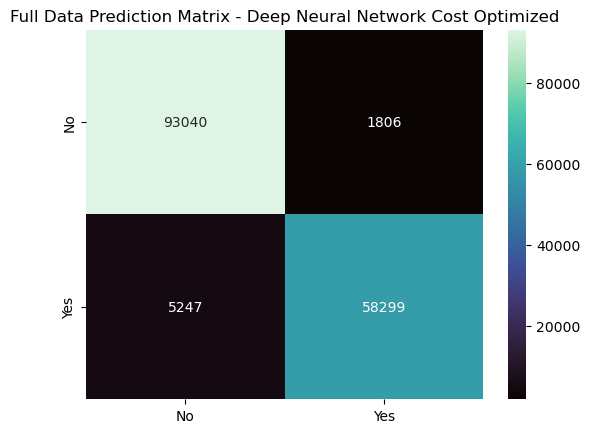

In [48]:
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap = 'mako')
plt.title('Full Data Prediction Matrix - Deep Neural Network Cost Optimized')
plt.xticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.yticks(ticks = [.5,1.5], labels = ['No','Yes'])
plt.show()